# Xây dựng mô hình Deep Learning dự đoán điểm thi của sinh viên dựa trên điểm thành phần

Dataset là bảng điểm của 4 lớp: lop71, lop72, lop31, lop32

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense

## Loading data

In [2]:
df_31 = pd.read_csv('./lop31.csv')
df_31.dtypes, df_31.head()

(ho_ten     object
 10%       float64
 20%       float64
 20%.1     float64
 thi       float64
 dtype: object,
    ho_ten    10%   20%  20%.1   thi
 0  31_011  8.375  7.25    8.5   9.0
 1  31_012  8.250  7.25    8.5   9.0
 2  31_013  8.500  7.50    8.5  10.0
 3  31_014  4.000  7.25    8.5   9.0
 4  31_015  8.750  7.50    8.5   9.5)

### Phát hiện bảng điểm của lớp 32 có dữ liệu chưa ở dạng số, cần xử lý (VD: 7,5 -> 7.5)

In [3]:
df_32 = pd.read_csv('./lop32.csv')
df_32.dtypes, df_32.head()

(ho_ten         object
 10%            object
 20%            object
 BT bo sung    float64
 20%.1         float64
 thi           float64
 dtype: object,
    ho_ten   10%   20%  BT bo sung  20%.1   thi
 0  32_011  7.25   6.5        6.00   6.50  6.75
 1  32_012     7   7.5        5.00   7.50  7.00
 2  32_013     7  7.25        5.25   7.25  7.00
 3  32_014   6.5     7        5.25   7.00  6.50
 4  32_015   7.5     7        5.00   7.00  7.25)

In [4]:
df_32 = df_32.drop("BT bo sung", axis=1)

In [5]:
df_32["10%"].unique(), df_32["20%"].unique()

(array(['7.25', '7', '6.5', '7.5', '8', '9', '9.5', '9.25', '9.375',
        '9.125', '7,5', '6.75', '6', '7.75', '0', '8.125', '8.75', '8.5',
        '8.25', '7.625', '5.5', '4', '3.5'], dtype=object),
 array(['6.5', '7.5', '7.25', '7', '6.75', '6.25', '6', '7.375', '7.75',
        '8.25', '6,5', '6,75', '8', '6.8', '6.125', '3.123', '5.5', '3.75',
        '3.5', '7.875', '6.875', '8.75', '3'], dtype=object))

In [6]:
df_32['10%'] = df_32['10%'].str.replace(',','.')
df_32["10%"] = pd.to_numeric(df_32["10%"], errors='coerce')

df_32['20%'] = df_32['20%'].str.replace(',','.')
df_32["20%"] = pd.to_numeric(df_32["20%"], errors='coerce')

In [7]:
df_71 = pd.read_csv('./lop71.csv')
df_71.dtypes, df_71.head()

(ho_ten     object
 10%       float64
 20%       float64
 20%.1     float64
 thi       float64
 dtype: object,
    ho_ten   10%  20%  20%.1   thi
 0  71_011  6.50  6.5    6.0  6.50
 1  71_012  5.50  5.5    6.0  5.00
 2  71_013  6.50  7.0    7.0  6.75
 3  71_014  7.25  5.5    7.0  6.00
 4  71_021  7.50  5.0    6.0  6.00)

In [8]:
df_72 = pd.read_csv('./lop72.csv')
df_72.dtypes, df_72.head()

(ho_ten     object
 10%       float64
 20%       float64
 20%.1     float64
 thi       float64
 dtype: object,
    ho_ten   10%   20%  20%.1   thi
 0  72_011  6.00  6.50   7.00  6.75
 1  72_012  6.50  7.25   7.75  7.50
 2  72_013  5.75  6.75   7.25  7.00
 3  72_014  6.75  7.00   7.50  7.25
 4  72_015  6.00  6.50   7.00  6.75)

### Gộp dữ liệu của 4 lớp vào df

In [9]:
df = pd.concat([df_31, df_32, df_71, df_72], axis=0)
df.dtypes

ho_ten     object
10%       float64
20%       float64
20%.1     float64
thi       float64
dtype: object

### Xử lí dữ liệu theo hệ số điểm: 10% 20% 20% 50%

In [10]:
df

,ho_ten,10%,20%,20%.1,thi
0,31_011,8.375,7.250,8.50,9.0
1,31_012,8.250,7.250,8.50,9.0
2,31_013,8.500,7.500,8.50,10.0
3,31_014,4.000,7.250,8.50,9.0
4,31_015,8.750,7.500,8.50,9.5
...,...,...,...,...,...
72,72_151,7.375,6.500,7.50,7.0
73,72_152,7.250,6.750,7.00,7.0
74,72_153,7.125,6.750,6.75,7.0
75,72_154,7.750,6.375,7.50,7.0


In [11]:
df["10%"] = df["10%"] * 0.1
df["20%"] = df["20%"] * 0.2
df["20%.1"] = df["20%.1"] * 0.2
df["thi"] = df["thi"] * 0.5

In [12]:
df

,ho_ten,10%,20%,20%.1,thi
0,31_011,0.8375,1.450,1.70,4.50
1,31_012,0.8250,1.450,1.70,4.50
2,31_013,0.8500,1.500,1.70,5.00
3,31_014,0.4000,1.450,1.70,4.50
4,31_015,0.8750,1.500,1.70,4.75
...,...,...,...,...,...
72,72_151,0.7375,1.300,1.50,3.50
73,72_152,0.7250,1.350,1.40,3.50
74,72_153,0.7125,1.350,1.35,3.50
75,72_154,0.7750,1.275,1.50,3.50


In [13]:
df = df.drop("ho_ten", axis=1)

## Checking missing values

In [14]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
10%      2
20%      2
20%.1    2
thi      4
dtype: int64


In [15]:
# df.fillna(df.mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [16]:
df.isnull().sum()

10%      0
20%      0
20%.1    0
thi      0
dtype: int64

## Normalization -  MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=['10%', '20%', '20%.1', 'thi'])
df_scaled

,10%,20%,20%.1,thi
0,0.8375,0.828571,0.894737,0.90
1,0.8250,0.828571,0.894737,0.90
2,0.8500,0.857143,0.894737,1.00
3,0.4000,0.828571,0.894737,0.90
4,0.8750,0.857143,0.894737,0.95
...,...,...,...,...
288,0.7375,0.742857,0.789474,0.70
289,0.7250,0.771429,0.736842,0.70
290,0.7125,0.771429,0.710526,0.70
291,0.7750,0.728571,0.789474,0.70


In [18]:
# scaler.inverse_transform(scaled)

## Xem độ tương quan giữa các features

In [19]:
corr = df_scaled.corr()
corr

,10%,20%,20%.1,thi
10%,1.000000,0.591100,0.624201,0.595732
20%,0.591100,1.000000,0.792902,0.783534
20%.1,0.624201,0.792902,1.000000,0.921541
thi,0.595732,0.783534,0.921541,1.000000


<AxesSubplot:>

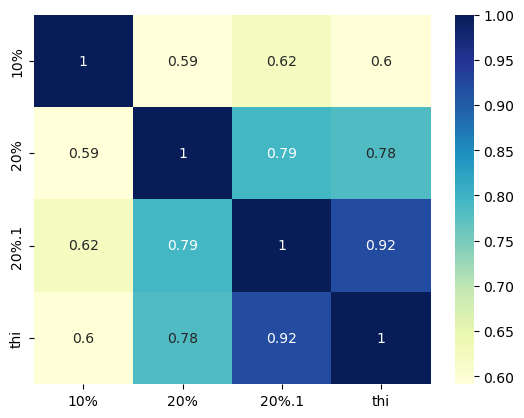

In [20]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

## Trực quan hóa dữ liệu

#### Tương quan giữa điểm 10% và điểm thi

Text(0, 0.5, 'thi')

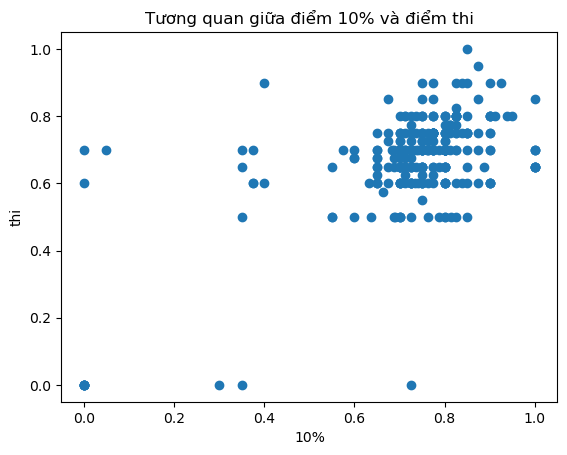

In [21]:
plt.scatter(df_scaled["10%"], df_scaled["thi"])
plt.title("Tương quan giữa điểm 10% và điểm thi")
plt.xlabel("10%")
plt.ylabel("thi")

#### Tương quan giữa điểm 20% và điểm thi

Text(0, 0.5, 'thi')

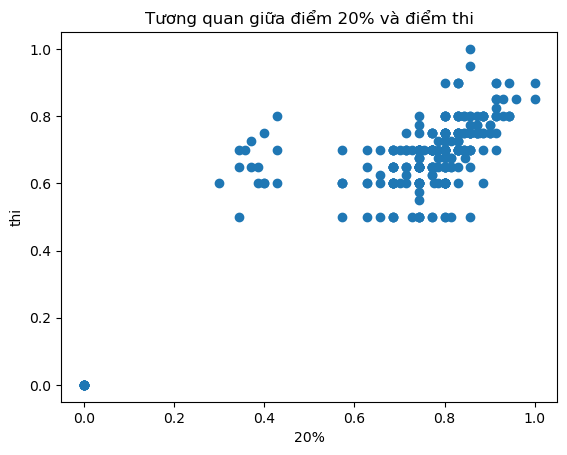

In [22]:
plt.scatter(df_scaled["20%"], df_scaled["thi"])
plt.title("Tương quan giữa điểm 20% và điểm thi")
plt.xlabel("20%")
plt.ylabel("thi")

#### Tương quan giữa điểm 20%.1 và điểm thi

Text(0, 0.5, 'thi')

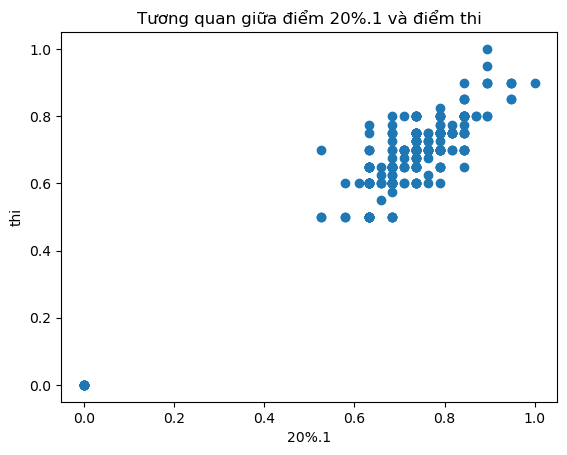

In [23]:
plt.scatter(df_scaled["20%.1"], df_scaled["thi"])
plt.title("Tương quan giữa điểm 20%.1 và điểm thi")
plt.xlabel("20%.1")
plt.ylabel("thi")

##### Từ đó thấy được, điểm thành phần cao -> điểm thi cao (tuyến tính)

### Xem phân phối điểm thi

<AxesSubplot:>

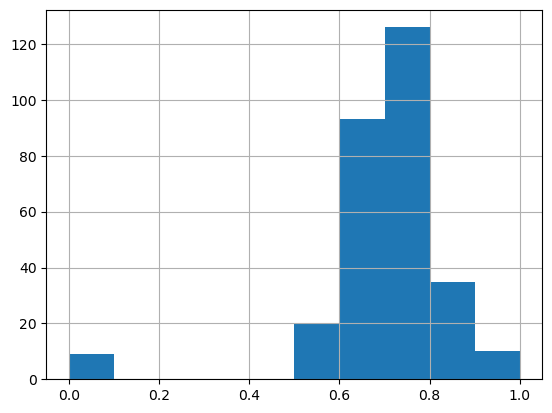

In [24]:
df_scaled["thi"].hist()

## Chia tập dữ liệu thành các tập train, test, validation

In [25]:
X = df_scaled.drop("thi", axis=1) # Vì cột họ tên không cần thiết đưa vào để train model
y = df_scaled["thi"]

In [26]:
np.random.seed(3005)
# Create train and test dataset with an 80:20 split+
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=3005)
# Further divide training dataset into train and validation dataset with an 90:10 split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=3005)

#Check the shape of each new dataset created
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (210, 3)
Shape of X_test: (59, 3)
Shape of X_val: (24, 3)
Shape of y_train: (210,)
Shape of y_test: (59,)
Shape of y_val: (24,)


## Designing the DNN
* Rule 1: Start with small architectures
* Rule 2: When small architectures (with two layers) fail, increase the size
* Rule 3: When larger networks with two layers fail, go deeper
* Rule 4: When larger and deeper networks also fail, go even larger and even deeper
* Rule 5: When everything fails, revisit the data

## Xây dựng mô hình:
optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error']

###  0 hidden layer - 1 neurons, batch_size=8

#### epochs=20

Epoch 1/20
27/27 [==============================] - 1s 8ms/step - loss: 0.1336 - mean_absolute_error: 0.1336 - val_loss: 0.0950 - val_mean_absolute_error: 0.0950
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - val_loss: 0.0825 - val_mean_absolute_error: 0.0825
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - val_loss: 0.0838 - val_mean_absolute_error: 0.0838
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - val_loss: 0.0817 - val_mean_absolute_error: 0.0817
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - val_loss: 0.0835 - val_mean_absolute_error: 0.0835
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - val_loss: 0.0813 - val_mean_absolute_error: 0.0813
Epoch 7/20
27/27 [==========

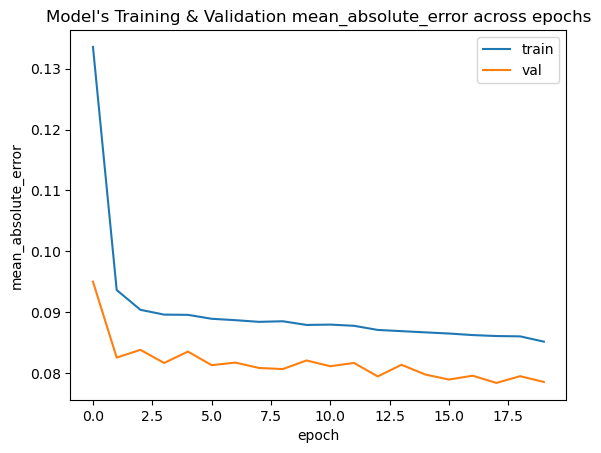

In [27]:
# Create Deep Neural Network Architecture
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

#configure the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [28]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0852 - mean_absolute_error: 0.0852


[0.08517730981111526, 0.08517731726169586]

#### epochs=100

Epoch 1/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - val_loss: 0.0786 - val_mean_absolute_error: 0.0786
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - val_loss: 0.0775 - val_mean_absolute_error: 0.0775
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - val_loss: 0.0784 - val_mean_absolute_error: 0.0784
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - val_loss: 0.0778 - val_mean_absolute_error: 0.0778
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - val_loss: 0.0781 - val_mean_absolute_error: 0.0781
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - val_loss: 0.0776 - val_mean_absolute_error: 0.0776
Epoch 7/100
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - val_loss: 0.0673 - val_mean_absolute_error: 0.0673
Epoch 52/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - val_loss: 0.0680 - val_mean_absolute_error: 0.0680
Epoch 53/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.0668 - val_mean_absolute_error: 0.0668
Epoch 54/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.0666 - val_mean_absolute_error: 0.0666
Epoch 55/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - val_loss: 0.0672 - val_mean_absolute_error: 0.0672
Epoch 56/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - val_loss: 0.0662 - val_mean_absolute_error: 0.0662
Epoch 57/100
27/27 [=========

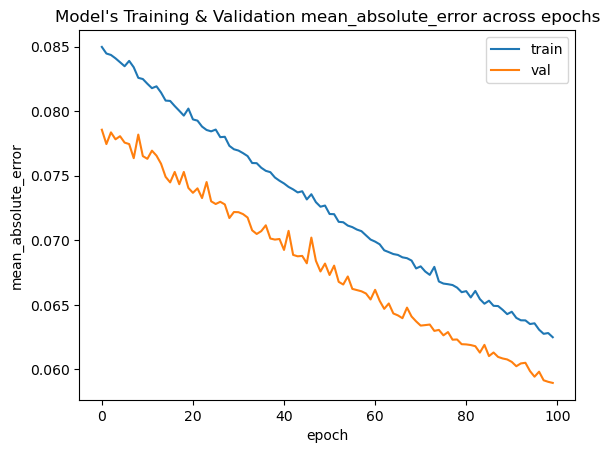

In [29]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=8)

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [30]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - mean_absolute_error: 0.0646


[0.06464474648237228, 0.06464474648237228]

#### epochs=350

Epoch 1/350
27/27 [==============================] - 0s 4ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - val_loss: 0.0590 - val_mean_absolute_error: 0.0590
Epoch 2/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585
Epoch 3/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - val_loss: 0.0584 - val_mean_absolute_error: 0.0584
Epoch 4/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582
Epoch 5/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - val_loss: 0.0581 - val_mean_absolute_error: 0.0581
Epoch 6/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - val_loss: 0.0580 - val_mean_absolute_error: 0.0580
Epoch 7/350
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - val_loss: 0.0537 - val_mean_absolute_error: 0.0537
Epoch 52/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - val_loss: 0.0539 - val_mean_absolute_error: 0.0539
Epoch 53/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - val_loss: 0.0536 - val_mean_absolute_error: 0.0536
Epoch 54/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - val_loss: 0.0535 - val_mean_absolute_error: 0.0535
Epoch 55/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - val_loss: 0.0533 - val_mean_absolute_error: 0.0533
Epoch 56/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - val_loss: 0.0534 - val_mean_absolute_error: 0.0534
Epoch 57/350
27/27 [=========

27/27 [==============================] - 0s 3ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - val_loss: 0.0498 - val_mean_absolute_error: 0.0498
Epoch 102/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - val_loss: 0.0508 - val_mean_absolute_error: 0.0508
Epoch 103/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - val_loss: 0.0497 - val_mean_absolute_error: 0.0497
Epoch 104/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - val_loss: 0.0506 - val_mean_absolute_error: 0.0506
Epoch 105/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - val_loss: 0.0505 - val_mean_absolute_error: 0.0505
Epoch 106/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - val_loss: 0.0494 - val_mean_absolute_error: 0.0494
Epoch 107/350
27/27 [===

Epoch 151/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - val_loss: 0.0473 - val_mean_absolute_error: 0.0473
Epoch 152/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - val_loss: 0.0472 - val_mean_absolute_error: 0.0472
Epoch 153/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - val_loss: 0.0477 - val_mean_absolute_error: 0.0477
Epoch 154/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - val_loss: 0.0468 - val_mean_absolute_error: 0.0468
Epoch 155/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - val_loss: 0.0473 - val_mean_absolute_error: 0.0473
Epoch 156/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - val_loss: 0.0471 - val_mean_absolute_error: 0.0471
Epoch 157/

Epoch 201/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - val_loss: 0.0448 - val_mean_absolute_error: 0.0448
Epoch 202/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - val_loss: 0.0452 - val_mean_absolute_error: 0.0452
Epoch 203/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - val_loss: 0.0451 - val_mean_absolute_error: 0.0451
Epoch 204/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - val_loss: 0.0448 - val_mean_absolute_error: 0.0448
Epoch 205/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.0453 - val_mean_absolute_error: 0.0453
Epoch 206/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - val_loss: 0.0447 - val_mean_absolute_error: 0.0447
Epoch 207/

Epoch 251/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - val_loss: 0.0428 - val_mean_absolute_error: 0.0428
Epoch 252/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - val_loss: 0.0431 - val_mean_absolute_error: 0.0431
Epoch 253/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 254/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0441 - val_mean_absolute_error: 0.0441
Epoch 255/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 256/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0424 - val_mean_absolute_error: 0.0424
Epoch 257/

Epoch 301/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - val_loss: 0.0416 - val_mean_absolute_error: 0.0416
Epoch 302/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - val_loss: 0.0401 - val_mean_absolute_error: 0.0401
Epoch 303/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - val_loss: 0.0412 - val_mean_absolute_error: 0.0412
Epoch 304/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - val_loss: 0.0402 - val_mean_absolute_error: 0.0402
Epoch 305/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - val_loss: 0.0400 - val_mean_absolute_error: 0.0400
Epoch 306/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - val_loss: 0.0418 - val_mean_absolute_error: 0.0418
Epoch 307/

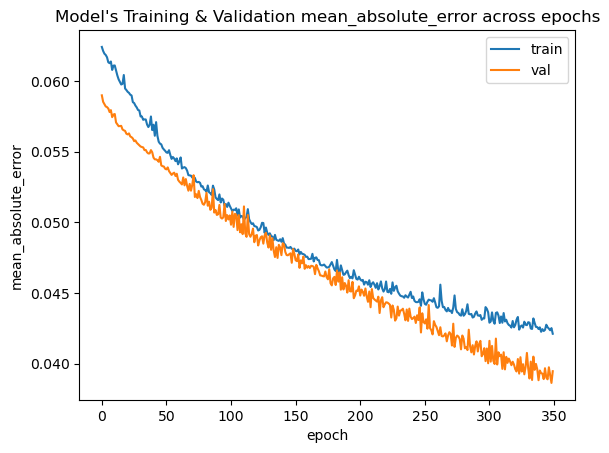

In [31]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=350, batch_size=8)

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [32]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0468 - mean_absolute_error: 0.0468


[0.04676446318626404, 0.04676446318626404]

#### epochs=500

Epoch 1/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0392 - val_mean_absolute_error: 0.0392
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0387 - val_mean_absolute_error: 0.0387
Epoch 3/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0388 - val_mean_absolute_error: 0.0388
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - val_loss: 0.0391 - val_mean_absolute_error: 0.0391
Epoch 5/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.0396 - val_mean_absolute_error: 0.0396
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.0387 - val_mean_absolute_error: 0.0387
Epoch 7/500
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371
Epoch 52/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377
Epoch 53/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383
Epoch 54/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0373 - val_mean_absolute_error: 0.0373
Epoch 55/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385
Epoch 56/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369
Epoch 57/500
27/27 [=========

27/27 [==============================] - 0s 3ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355
Epoch 102/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0365 - val_mean_absolute_error: 0.0365
Epoch 103/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0361 - val_mean_absolute_error: 0.0361
Epoch 104/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362
Epoch 105/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362
Epoch 106/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354
Epoch 107/500
27/27 [===

Epoch 151/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 152/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0351 - val_mean_absolute_error: 0.0351
Epoch 153/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 154/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 155/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 156/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 157/

Epoch 201/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346
Epoch 202/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339
Epoch 203/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335
Epoch 204/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352
Epoch 205/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352
Epoch 206/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338
Epoch 207/

Epoch 251/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 252/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 253/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 254/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338
Epoch 255/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 256/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338
Epoch 257/

Epoch 301/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345
Epoch 302/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 303/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 304/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 305/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 306/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 307/

Epoch 351/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 352/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 353/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325
Epoch 354/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 355/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325
Epoch 356/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 357/

Epoch 401/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 402/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 403/500
27/27 [==============================] - 0s 5ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 404/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 405/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339
Epoch 406/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 407/

Epoch 451/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 452/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 453/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 454/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 455/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 456/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 457/

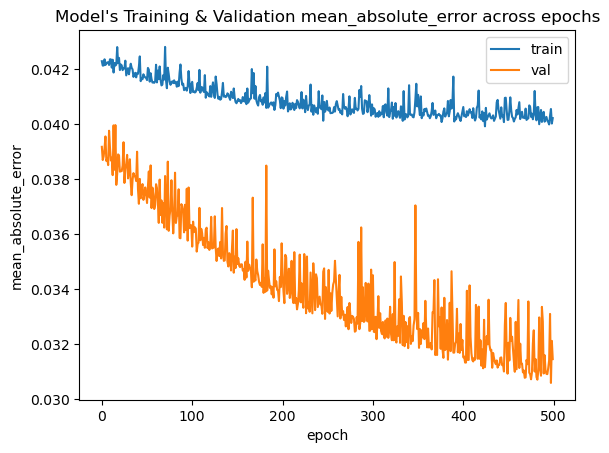

In [33]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=8)

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [34]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0449 - mean_absolute_error: 0.0449


[0.04494692012667656, 0.04494692012667656]

### 1 hidden layer - 8 neurons, batch_size=8

#### epochs=20

Epoch 1/20
27/27 [==============================] - 1s 7ms/step - loss: 0.9670 - mean_absolute_error: 0.9670 - val_loss: 0.7922 - val_mean_absolute_error: 0.7922
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.7070 - mean_absolute_error: 0.7070 - val_loss: 0.5619 - val_mean_absolute_error: 0.5619
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.4654 - mean_absolute_error: 0.4654 - val_loss: 0.3415 - val_mean_absolute_error: 0.3415
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - val_loss: 0.1258 - val_mean_absolute_error: 0.1258
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - val_loss: 0.0810 - val_mean_absolute_error: 0.0810
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - val_loss: 0.0776 - val_mean_absolute_error: 0.0776
Epoch 7/20
27/27 [==========

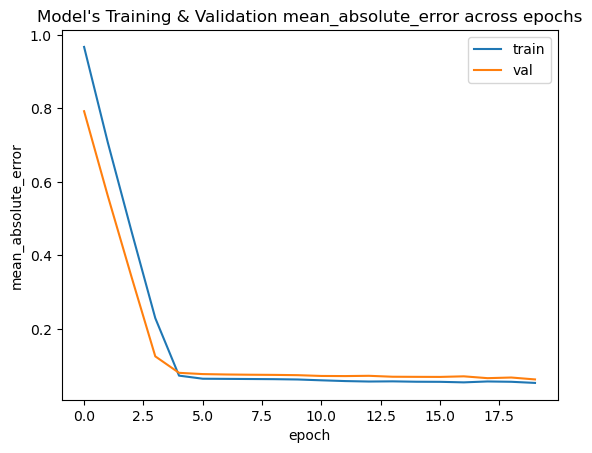

In [35]:
# Create Deep Neural Network Architecture
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation = 'linear'))

#configure the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [36]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0676 - mean_absolute_error: 0.0676


[0.06761617213487625, 0.06761617213487625]

#### epochs=100

Epoch 1/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - val_loss: 0.0633 - val_mean_absolute_error: 0.0633
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - val_loss: 0.0608 - val_mean_absolute_error: 0.0608
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - val_loss: 0.0603 - val_mean_absolute_error: 0.0603
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - val_loss: 0.0601 - val_mean_absolute_error: 0.0601
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - val_loss: 0.0587 - val_mean_absolute_error: 0.0587
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - val_loss: 0.0677 - val_mean_absolute_error: 0.0677
Epoch 7/100
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - val_loss: 0.0382 - val_mean_absolute_error: 0.0382
Epoch 52/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - val_loss: 0.0401 - val_mean_absolute_error: 0.0401
Epoch 53/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377
Epoch 54/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - val_loss: 0.0373 - val_mean_absolute_error: 0.0373
Epoch 55/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - val_loss: 0.0372 - val_mean_absolute_error: 0.0372
Epoch 56/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377
Epoch 57/100
27/27 [=========

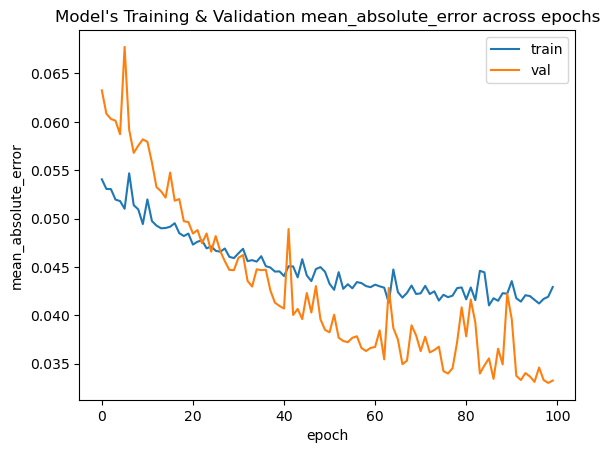

In [37]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [38]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0467 - mean_absolute_error: 0.0467


[0.046695079654455185, 0.046695079654455185]

#### epochs=350

Epoch 1/350
27/27 [==============================] - 0s 4ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 2/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 3/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385
Epoch 4/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360
Epoch 5/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354
Epoch 6/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 7/350
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 52/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 53/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0401 - val_mean_absolute_error: 0.0401
Epoch 54/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335
Epoch 55/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 56/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 57/350
27/27 [=========

27/27 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317
Epoch 102/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 103/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 104/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 105/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 106/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 107/350
27/27 [===

Epoch 151/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 152/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 153/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 154/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 155/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 156/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 157/

Epoch 201/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 202/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353
Epoch 203/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335
Epoch 204/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 205/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 206/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 207/

Epoch 251/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 252/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345
Epoch 253/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317
Epoch 254/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 255/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317
Epoch 256/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 257/

Epoch 301/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 302/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 303/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 304/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 305/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 306/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 307/

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


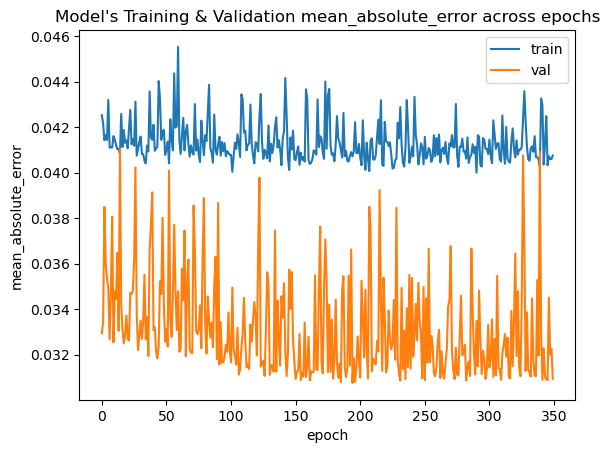

In [39]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=350, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [40]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0457 - mean_absolute_error: 0.0457


[0.04566386714577675, 0.04566386714577675]

#### epochs=500

Epoch 1/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 3/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317
Epoch 5/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 7/500
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 52/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0425 - val_mean_absolute_error: 0.0425
Epoch 53/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346
Epoch 54/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 55/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 56/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 57/500
27/27 [=========

27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 102/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375
Epoch 103/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 104/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306
Epoch 105/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 106/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 107/500
27/27 [===

Epoch 151/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 152/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 153/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 154/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 155/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 156/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 157/

Epoch 201/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 202/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 203/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 204/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 205/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0335 - val_mean_absolute_error: 0.0335
Epoch 206/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 207/

Epoch 251/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 252/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 253/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 254/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 255/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 256/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 257/

Epoch 301/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352
Epoch 302/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 303/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 304/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 305/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 306/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 307/

Epoch 351/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0310 - val_mean_absolute_error: 0.0310
Epoch 352/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 353/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 354/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306
Epoch 355/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 356/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357
Epoch 357/

Epoch 401/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333
Epoch 402/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 403/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 404/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 405/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 406/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 407/

Epoch 451/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 452/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 453/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 454/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 455/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 456/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 457/

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


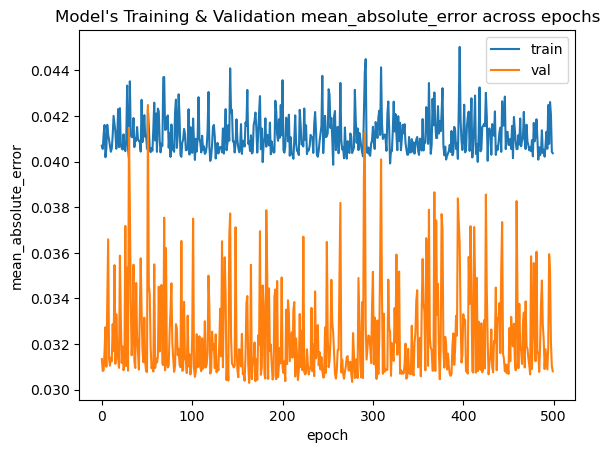

In [41]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [42]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462


[0.04618002846837044, 0.04618002846837044]

### Deeper: 2 hidden layer - 8 neurons, batch_size=8

#### epochs=20

Epoch 1/20
27/27 [==============================] - 1s 7ms/step - loss: 0.7727 - mean_absolute_error: 0.7727 - val_loss: 0.6367 - val_mean_absolute_error: 0.6367
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5752 - mean_absolute_error: 0.5752 - val_loss: 0.4506 - val_mean_absolute_error: 0.4506
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.3612 - mean_absolute_error: 0.3612 - val_loss: 0.2294 - val_mean_absolute_error: 0.2294
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - val_loss: 0.0624 - val_mean_absolute_error: 0.0624
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - val_loss: 0.0629 - val_mean_absolute_error: 0.0629
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - val_loss: 0.0605 - val_mean_absolute_error: 0.0605
Epoch 7/20
27/27 [==========

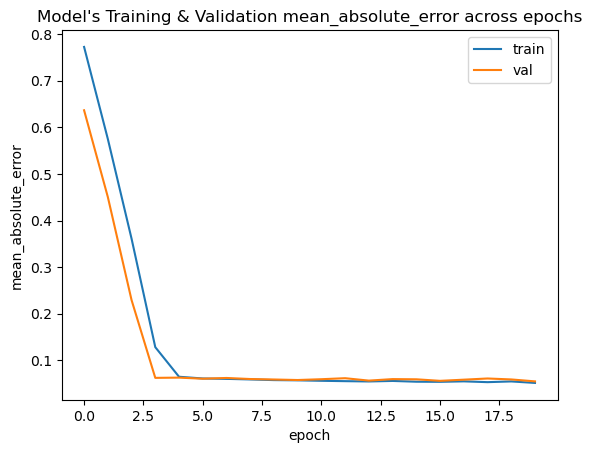

In [43]:
# Create Deep Neural Network Architecture
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation = 'linear'))

#configure the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [44]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0609 - mean_absolute_error: 0.0609


[0.06091679632663727, 0.06091679632663727]

#### epochs=100

Epoch 1/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - val_loss: 0.0544 - val_mean_absolute_error: 0.0544
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - val_loss: 0.0565 - val_mean_absolute_error: 0.0565
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - val_loss: 0.0546 - val_mean_absolute_error: 0.0546
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - val_loss: 0.0570 - val_mean_absolute_error: 0.0570
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - val_loss: 0.0520 - val_mean_absolute_error: 0.0520
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - val_loss: 0.0557 - val_mean_absolute_error: 0.0557
Epoch 7/100
27/27 [===

27/27 [==============================] - 0s 3ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.0380 - val_mean_absolute_error: 0.0380
Epoch 52/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - val_loss: 0.0361 - val_mean_absolute_error: 0.0361
Epoch 53/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369
Epoch 54/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360
Epoch 55/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - val_loss: 0.0363 - val_mean_absolute_error: 0.0363
Epoch 56/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 57/100
27/27 [=========

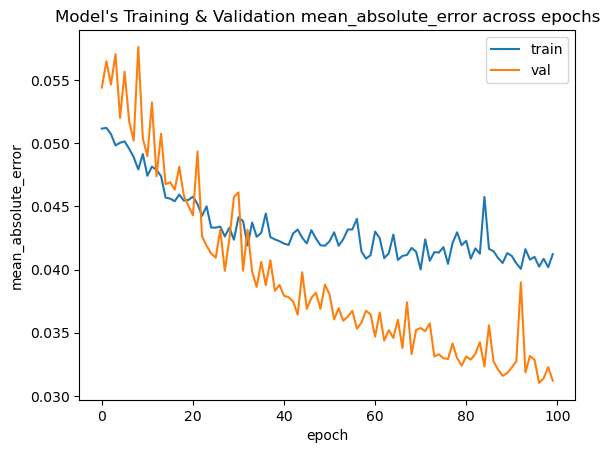

In [45]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [46]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438


[0.0438438318669796, 0.0438438318669796]

#### epochs=350

Epoch 1/350
27/27 [==============================] - 0s 4ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343
Epoch 2/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 3/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 4/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 5/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0363 - val_mean_absolute_error: 0.0363
Epoch 6/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355
Epoch 7/350
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291
Epoch 52/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 53/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 54/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 55/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 56/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346
Epoch 57/350
27/27 [=========

27/27 [==============================] - 0s 3ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 102/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 103/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 104/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285
Epoch 105/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 106/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - val_loss: 0.0354 - val_mean_absolute_error: 0.0354
Epoch 107/350
27/27 [===

Epoch 151/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 152/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 153/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 154/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0286 - val_mean_absolute_error: 0.0286
Epoch 155/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 156/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 157/

Epoch 201/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283
Epoch 202/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 203/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 204/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 205/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 206/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 207/

Epoch 251/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 252/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 253/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 254/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 255/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 256/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 257/

Epoch 301/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 302/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 303/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - val_loss: 0.0286 - val_mean_absolute_error: 0.0286
Epoch 304/350
27/27 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 305/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 306/350
27/27 [==============================] - 0s 3ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 307/

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


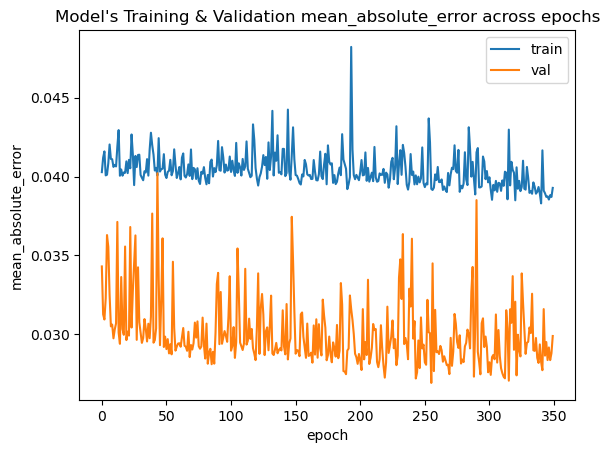

In [47]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=350, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [48]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476


[0.04756050184369087, 0.04756050184369087]

#### epochs=500

Epoch 1/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298
Epoch 2/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 3/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 5/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 7/500
27/27 [===

27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 52/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 53/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299
Epoch 54/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0286 - val_mean_absolute_error: 0.0286
Epoch 55/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 56/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289
Epoch 57/500
27/27 [=========

27/27 [==============================] - 0s 3ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 102/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341
Epoch 103/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 104/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299
Epoch 105/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 106/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 107/500
27/27 [===

Epoch 151/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 152/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0270 - val_mean_absolute_error: 0.0270
Epoch 153/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 154/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303
Epoch 155/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 156/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 157/

Epoch 201/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 202/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288
Epoch 203/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303
Epoch 204/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 205/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0290 - val_mean_absolute_error: 0.0290
Epoch 206/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 207/

Epoch 251/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273
Epoch 252/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0283 - val_mean_absolute_error: 0.0283
Epoch 253/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 254/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281
Epoch 255/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 256/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 257/

Epoch 301/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340
Epoch 302/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.0280 - val_mean_absolute_error: 0.0280
Epoch 303/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 304/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 305/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 306/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 307/

Epoch 351/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 352/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 353/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 354/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0286 - val_mean_absolute_error: 0.0286
Epoch 355/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289
Epoch 356/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - val_loss: 0.0292 - val_mean_absolute_error: 0.0292
Epoch 357/

Epoch 401/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300
Epoch 402/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325
Epoch 403/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 404/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 405/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 406/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0348 - val_mean_absolute_error: 0.0348
Epoch 407/

Epoch 451/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 452/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 453/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 454/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 455/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 456/500
27/27 [==============================] - 0s 2ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 457/

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


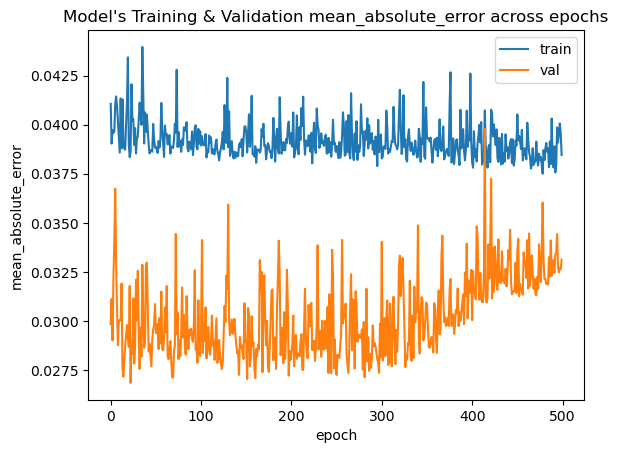

In [49]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [50]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0454 - mean_absolute_error: 0.0454


[0.04536968842148781, 0.04536968842148781]

### Deepest: 2 hidden layer - 16 neurons, batch_size=8, epochs=2000

Epoch 1/2000
27/27 [==============================] - 1s 7ms/step - loss: 0.9147 - mean_absolute_error: 0.9147 - val_loss: 0.7536 - val_mean_absolute_error: 0.7536
Epoch 2/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.7288 - mean_absolute_error: 0.7288 - val_loss: 0.6492 - val_mean_absolute_error: 0.6492
Epoch 3/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.6195 - mean_absolute_error: 0.6195 - val_loss: 0.5311 - val_mean_absolute_error: 0.5311
Epoch 4/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.4844 - mean_absolute_error: 0.4844 - val_loss: 0.3852 - val_mean_absolute_error: 0.3852
Epoch 5/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - val_loss: 0.1367 - val_mean_absolute_error: 0.1367
Epoch 6/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - val_loss: 0.0612 - val_mean_absolute_error: 0.0612
Epoch 7/2000
27/

Epoch 51/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 52/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340
Epoch 53/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 54/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370
Epoch 55/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 56/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 57/2

27/27 [==============================] - 0s 3ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298
Epoch 150/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 151/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 152/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 153/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 154/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 155/2000
27/2

27/27 [==============================] - 0s 3ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 248/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 249/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287
Epoch 250/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285
Epoch 251/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 252/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 253/2000
27/2

27/27 [==============================] - 0s 2ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 346/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 347/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298
Epoch 348/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326
Epoch 349/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 350/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 351/2000
27/2

27/27 [==============================] - 0s 3ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 444/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 445/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 446/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 447/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 448/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 449/2000
27/2

27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 542/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 543/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 544/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 545/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 546/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0346 - val_mean_absolute_error: 0.0346
Epoch 547/2000
27/2

27/27 [==============================] - 0s 3ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 640/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 641/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 642/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 643/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339
Epoch 644/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - val_loss: 0.0384 - val_mean_absolute_error: 0.0384
Epoch 645/2000
27/2

27/27 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 738/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - val_loss: 0.0305 - val_mean_absolute_error: 0.0305
Epoch 739/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326
Epoch 740/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 741/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 742/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 743/2000
27/2

27/27 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 836/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340
Epoch 837/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 838/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 839/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326
Epoch 840/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306
Epoch 841/2000
27/2

27/27 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 934/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 935/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302
Epoch 936/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303
Epoch 937/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 938/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320
Epoch 939/2000
27/2

27/27 [==============================] - 0s 2ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 1032/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 1033/2000
27/27 [==============================] - 0s 3ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 1034/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 1035/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 1036/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 1037/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 1130/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333
Epoch 1131/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 1132/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 1133/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 1134/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325
Epoch 1135/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 1228/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - val_loss: 0.0370 - val_mean_absolute_error: 0.0370
Epoch 1229/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 1230/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 1231/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341
Epoch 1232/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 1233/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0397 - val_mean_absolute_error: 0.0397
Epoch 1326/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - val_loss: 0.0326 - val_mean_absolute_error: 0.0326
Epoch 1327/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 1328/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 1329/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0390 - val_mean_absolute_error: 0.0390
Epoch 1330/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345
Epoch 1331/200

27/27 [==============================] - 0s 3ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 1424/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 1425/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333
Epoch 1426/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - val_loss: 0.0396 - val_mean_absolute_error: 0.0396
Epoch 1427/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 1428/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367
Epoch 1429/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 1522/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 1523/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322
Epoch 1524/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 1525/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 1526/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343
Epoch 1527/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.0361 - val_mean_absolute_error: 0.0361
Epoch 1620/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 1621/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - val_loss: 0.0313 - val_mean_absolute_error: 0.0313
Epoch 1622/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376
Epoch 1623/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - val_loss: 0.0329 - val_mean_absolute_error: 0.0329
Epoch 1624/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340
Epoch 1625/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345
Epoch 1718/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337
Epoch 1719/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 1720/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0328 - val_mean_absolute_error: 0.0328
Epoch 1721/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343
Epoch 1722/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341
Epoch 1723/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325
Epoch 1816/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325
Epoch 1817/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 1818/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 1819/2000
27/27 [==============================] - 0s 4ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 1820/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 1821/200

27/27 [==============================] - 0s 2ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337
Epoch 1914/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 1915/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342
Epoch 1916/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314
Epoch 1917/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - val_loss: 0.0359 - val_mean_absolute_error: 0.0359
Epoch 1918/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 1919/200

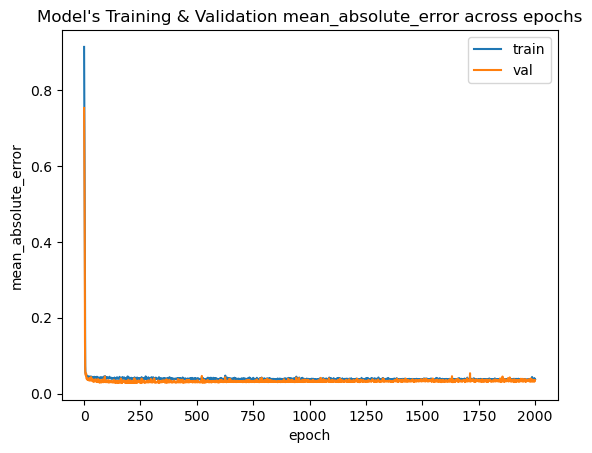

In [51]:
# Create Deep Neural Network Architecture
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'linear'))

#configure the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=8)
print(history.history.keys())

# add show A plot of loss on the training and validation datasets overtraining epochs
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title("Model's Training & Validation mean_absolute_error across epochs")
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [52]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0420 - mean_absolute_error: 0.0420


[0.0419984795153141, 0.0419984795153141]